# Anisha Patel
DSC 478

In [107]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [108]:
community = pd.read_csv("/Users/vinodpatel/Desktop/DePaul/DSC 478 Programming machine learning/Hw3/communities/communities.csv", na_values =["?", "Null", "missing"])

In [109]:
community.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [110]:
community.info()

##OtherPerCap has 1993 instances, replace the "?" with its mean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

In [112]:
community.describe(include = 'all')

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [113]:
community.isnull().sum().sum()

1

In [114]:
community[community.isnull().any(axis =1)]

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
130,28,Natchezcity,0.02,0.38,0.98,0.22,0.01,0.01,0.44,0.4,...,0.0,0.01,0.84,0.7,0.83,0.77,0.04,0.12,0.05,0.23


In [115]:
#Replacing the OtherPerCap missing value with its mean
OtherPerCap_mean = community.OtherPerCap.mean()
community.OtherPerCap.fillna(OtherPerCap_mean, axis =0, inplace =True)

In [116]:
community.info()

#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

In [117]:
community.describe().T

,count,mean,std,min,25%,50%,75%,max
state,1994.0,28.683551,16.397553,1.0,12.00,34.00,42.00,56.0
population,1994.0,0.057593,0.126906,0.0,0.01,0.02,0.05,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.35,0.44,0.54,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.02,0.06,0.23,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.63,0.85,0.94,1.0
...,...,...,...,...,...,...,...,...
PctSameState85,1994.0,0.651530,0.198221,0.0,0.56,0.70,0.79,1.0
LandArea,1994.0,0.065231,0.109459,0.0,0.02,0.04,0.07,1.0
PopDens,1994.0,0.232854,0.203092,0.0,0.10,0.17,0.28,1.0
PctUsePubTrans,1994.0,0.161685,0.229055,0.0,0.02,0.07,0.19,1.0


In [118]:
#Removing the State adn CommunityName
comm_table = community.iloc[:, 2:]
comm_table.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [119]:
#Seperate the target varible 
target = comm_table.ViolentCrimesPerPop
train = comm_table.iloc[:,:-1]

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
#Splitting the training and testing data.
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size =0.2, random_state =33)

In [122]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1595, 97)
(399, 97)
(1595,)
(399,)


# Question 2

Perform standard multiple linear regression on data using the scikit-learn Linear Regression module. Compute the RMSE values on the full training data (the 80% partition). Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights) and plot them using matplotlib. Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection).

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [125]:
#finidng prediction for training data
p_train = linreg.predict(X_train)

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Computing RMSE for train data
rmse_train = np.sqrt(mean_squared_error(p_train, Y_train))
print("RMSE on Test Data: ", rmse_train)

RMSE on Test Data:  0.1261959313342669


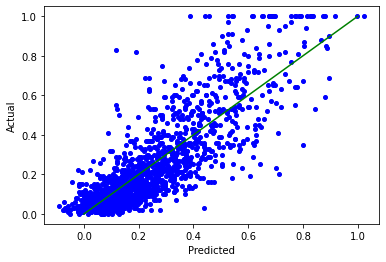

In [127]:
#Plotting correlation between predicted and actual training target variable
%matplotlib inline
pl.plot(p_train, Y_train,'bo', markersize=4)
pl.plot([0,1],[0,1], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

In [128]:
#Plotting the regression wieghts
%matplotlib inline
def plot_coefficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_, align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

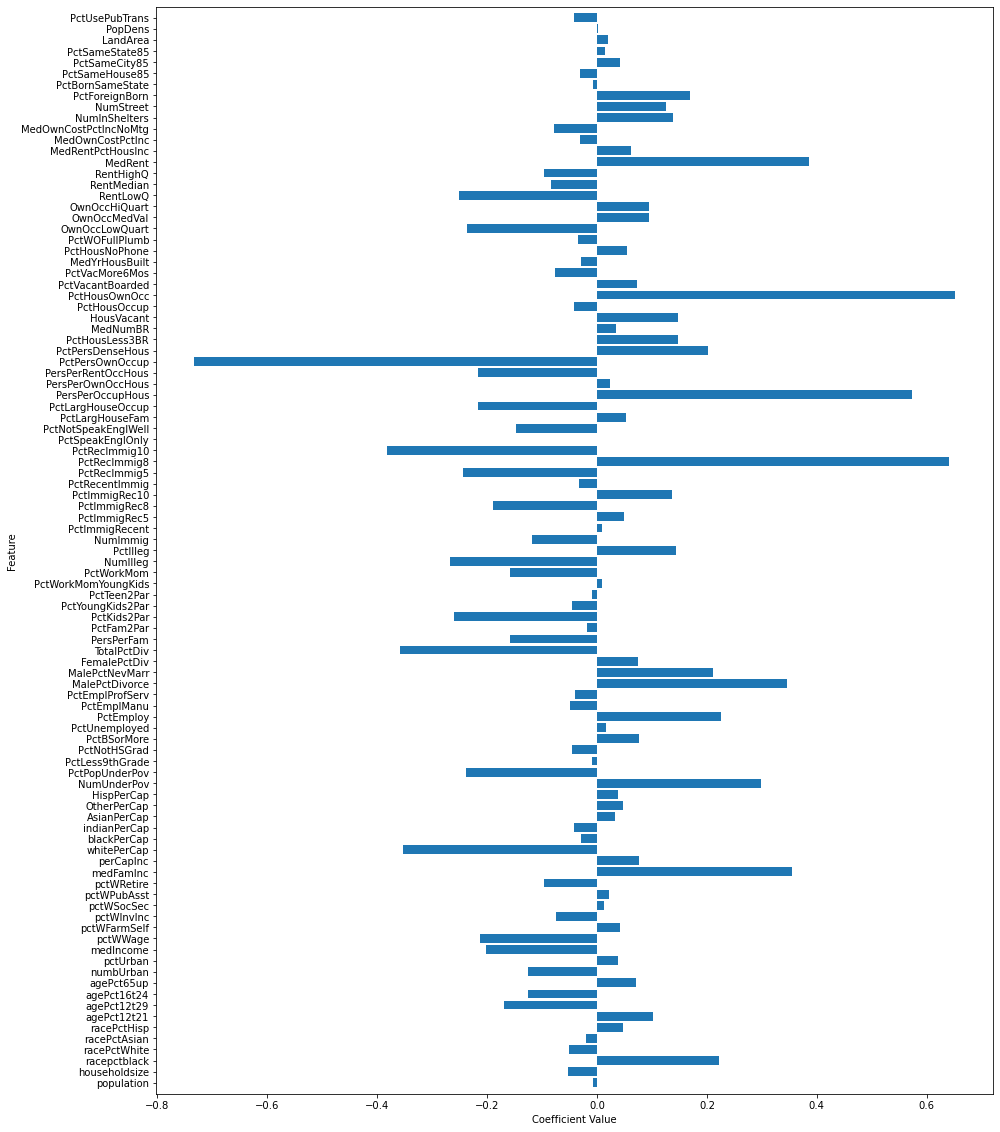

In [135]:
#Plotting the coefficients
plt.figure(figsize=(15,20))

plot_coefficients(linreg, len(train.columns), train.columns)


In [136]:
#10 fold cross-validation 
from sklearn.model_selection import cross_val_score


In [137]:
cv_scores = cross_val_score(linreg, X_train, Y_train, scoring ="neg_mean_squared_error", cv=10)
print(np.sqrt(abs(cv_scores)))
cv_rmse = np.mean(np.sqrt(abs(cv_scores)))

[0.14373935 0.13848502 0.13298995 0.1360245  0.1351074  0.13231055
 0.11917148 0.12158482 0.13669634 0.14684537]


In [138]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %cv_rmse)

Method: Simple Linear Regression
RMSE on training: 0.1262
RMSE on 10-fold CV: 0.1343


# RMSE performed better without 10-fold CV

# Question 1-C


[15 pts] Feature Selection:  use the scikit-learn to select the best subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data; target variable; the regression model; and any other parameters you find necessary. The function should return the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (use k=5 for consistency) and use feature_selection.SelectPercentile to find the most informative variables for a range of percentile values [Note: since this is regression not classification, in the SelectPercentile function you should use feature_selection.f_regression as scoring function rather than chi2). You should also plot the model's error values on cross-validation using only the selected features across the range of percentile values. For variety, in this part we will use Mean Absolute Error (MAE) as the error metric instead of RMSE. For cross-validation, use scikit's cross_val_score function. In order to use cross_val_score with regression you'll need to pass to it a specific error function. In this case, you will use scoring='neg_mean_absolute_error' as a parameter. You should use aboslute values to convert these negated MAE values to positive MAE values. Your plot should look similar (but won't be exactly the same as this example). Once you have identified the best percentile based on cross-validation, use it to identify and display the corresponding best features. As a final step, train your model on the full 80% training data with the optimal subset of features and then compute it's peformance (again using MAE) on the set-aside 20% test partitio

In [139]:
#Univariate linear regression tests returning F-statistic and p-value
from sklearn import feature_selection

In [147]:
from sklearn.feature_selection import f_regression, SelectPercentile
import math

In [148]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 20)
X_train_fs = fs.fit_transform(X_train, Y_train)
print(X_train_fs)

[[0.02 0.91 0.83 ... 0.83 0.   0.01]
 [0.59 0.44 0.44 ... 0.31 0.86 0.33]
 [0.02 0.95 0.75 ... 0.86 0.04 0.02]
 ...
 [0.23 0.76 0.77 ... 0.78 0.   0.03]
 [0.09 0.77 0.42 ... 0.24 0.04 0.06]
 [1.   0.   0.37 ... 0.23 1.   0.25]]


1 0.11287401163402822
6 0.09943268475677308
11 0.09900510519125442
16 0.09909059079526811
21 0.0975068622131086
26 0.09608904536542379
31 0.09478480270197638
36 0.09474955355002235
41 0.09435370428857698
46 0.09466441760571029
51 0.0949877334678105
56 0.0953208516480594
61 0.09574966889254502
66 0.09572089544915725
71 0.09583132229767206
76 0.09519157369784723
81 0.0954256882753639
86 0.09513624310358182
91 0.09525366581598065
96 0.09527627852883909
Optimal percentile of features:41

optimal_percent :  [8]  Optimal number of features:39 



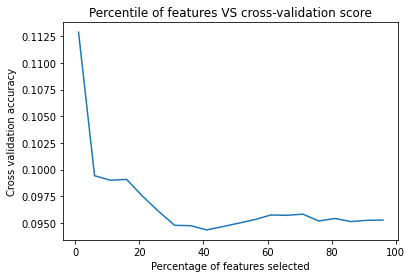

In [159]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


linreg = LinearRegression()
percentiles = range(1, 100, 5)
scorer ='neg_mean_absolute_error'
N =5

def optimal_num_features(model, X_train, Y_train, N, percentile, scorer):
    results = []

    for i in percentiles:
        fs = SelectPercentile(f_regression, percentile=i)
        X_train_fs = fs.fit_transform(X_train, Y_train)
        scores = abs(cross_val_score(model, X_train_fs, Y_train, cv=N, scoring = scorer))
        print (i, scores.mean())
        results = np.append(results, scores.mean())

    optimal_percentile = np.where(results == results.min())[0]
    print ("Optimal percentile of features:{0}".format(percentiles[int(optimal_percentile)]))
    return optimal_percentile, results

optimal_percent, results = optimal_num_features(linreg,X_train,Y_train,N,percentiles,scorer)

optimal_num_features = int(math.floor(percentiles[int(optimal_percent)]*X_train.shape[1])/100)
print ("\noptimal_percent : ",optimal_percent," Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.title("Percentile of features VS cross-validation score")
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)


In [180]:
print("optimal_percent ",percentiles[int(optimal_percent)])
print()
fs = SelectPercentile(f_regression,percentile=percentiles[int(optimal_percent)])
X_train_fs = fs.fit_transform(x_train,y_train)

for i in range(len(X_train.columns.values)):
    if fs.get_support()[i]:
        print (X_train.columns.values[i], '\t', fs.scores_[i])

optimal_percent  41

population 	 256.03235473720673
racepctblack 	 1074.8895092675361
racePctWhite 	 1412.5078123923954
numbUrban 	 247.77613854814695
medIncome 	 341.6325375231909
pctWWage 	 161.5707509415729
pctWInvInc 	 756.0149723312808
pctWPubAsst 	 784.5706408092502
medFamInc 	 366.9004218440602
perCapInc 	 214.99315799068873
NumUnderPov 	 400.3078568907995
PctPopUnderPov 	 578.817365213768
PctLess9thGrade 	 319.21810810192545
PctNotHSGrad 	 472.1962078690551
PctBSorMore 	 173.36684318428337
PctUnemployed 	 533.9131521991883
PctEmploy 	 190.46526246383803
MalePctDivorce 	 602.774893581606
FemalePctDiv 	 704.7727390048287
TotalPctDiv 	 693.1378303821938
PctFam2Par 	 1657.8650169980986
PctKids2Par 	 1972.8040638664002
PctYoungKids2Par 	 1342.173613787548
PctTeen2Par 	 1299.5351058426786
NumIlleg 	 431.63556026914654
PctIlleg 	 1936.1208737827078
PctLargHouseFam 	 241.23381636029765
PctPersOwnOccup 	 630.760339373988
PctPersDenseHous 	 375.6459018761194
PctHousLess3BR 	 487.9616808

The optimal percentile of features is 41 with CV accuracy of 0.0943. The optimal number of features are 39.  

In [226]:
fs = SelectPercentile(f_regression, optimal_percent)
X_train_fs = fs.fit_transform(X_train, Y_train)
linreg = LinearRegression()
linreg.fit(X_train_fs, Y_train)
X_test_fs = fs.transform(X_test)

predict = linreg.predict(X_test_fs)

score = mean_squared_error(Y_test,predict )
print("MAE score for test data on cv: {}".format(abs(score).mean()))


MAE score for test data on cv: 0.024076717731537724


/Users/vinodpatel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass percentile=[8] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# Que 1-D

Next, using the original train and test data in part (a), perform Ridge Regression and Lasso Regression using the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha hyperparameter (the regularization coefficient). You should create a function that takes as input the training data and target variable; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). For each model, you should also plot the error values (this time using RMSE as the error metric) on the training and cross-validation splits across the specified values of alpha. Finally, using the best alpha values for each regression model, train the model on the full training data and evaluate it on the set-aside test data. Discuss your observations and conclusions, especially about the impact of alpha on bias-variance trade-off. [Hint: for an example of a similar model optimization process please review the class example notebook.]

In [227]:
#Ridge Regression 
from sklearn.linear_model import Ridge

In [230]:
def calc_params(Data, y, model, param_values, param_name, K, verbose, model_name):
    
    # Convert input to Numpy arrays
    Data = np.array(Data)
    y = np.array(y)
    
    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for train, test in cv.split(Data):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            model.fit(Data[train], y[train])
            
            train_predict = model.predict(Data[train])
            test_predict = model.predict(Data[test])
            
            k_train_scores = np.sqrt(mean_squared_error(y[train], train_predict))
            k_test_scores = np.sqrt(mean_squared_error(y[test], test_predict))

        
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    fig = plt.figure(figsize=(15,10))
    
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='Test', alpha=0.4, lw=2, c='g')
    plt.title(model_name)
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Cross validation RMSE")

    min_err_idx = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err_idx]
    
    ##print ('The minimum MAE using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])
    
    # return the training and testing scores on each parameter value
    return train_scores, test_scores, min_err_alpha,min_err_idx

 train shape  (1595, 97)  y-train shape  (1595,)


 The minimum RMSE for " Ridge " using cross validation is: 0.13882110895925442 with alpha : 1.0060150753768842


 The minimum RMSE for " Lasso " using cross validation is: 0.14224582056412474 with alpha : 0.001


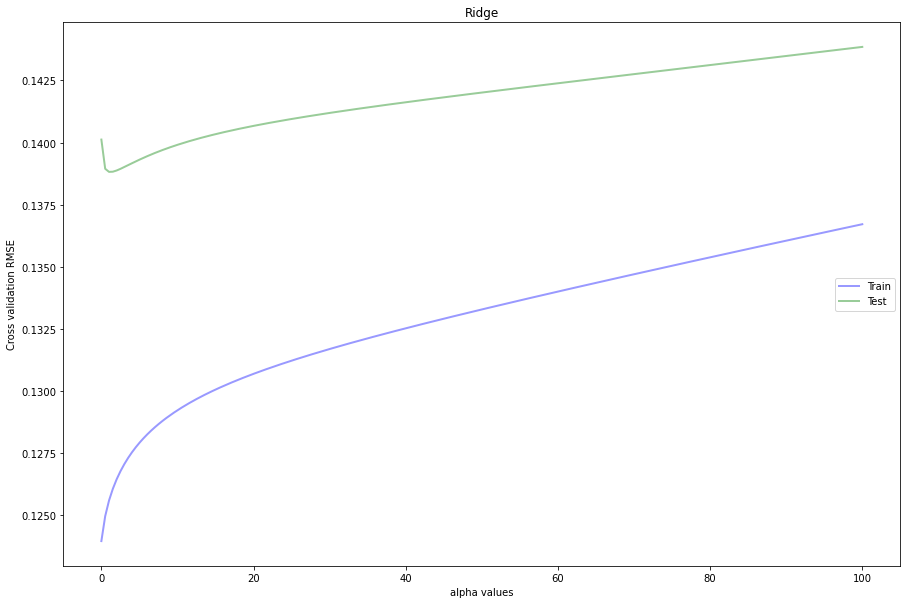

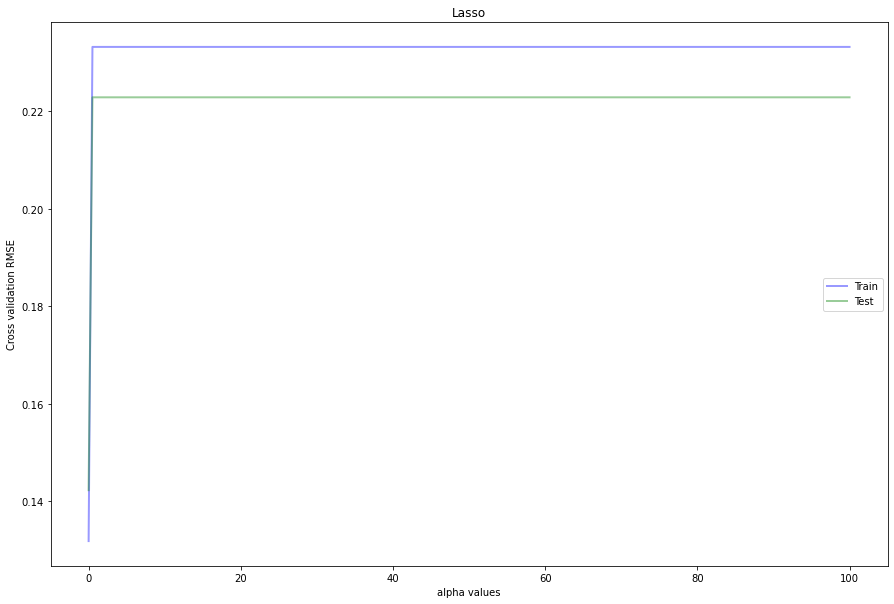

In [231]:
print(' train shape ',X_train.shape,' y-train shape ',Y_train.shape)

alpha = np.linspace(0.001, 100, 200)
alpha = np.array([float(e) for e in alpha])

number_of_fold = 5
param_name = 'alpha'
param_values = alpha
verbose = False

models = {'Ridge': Ridge(),'Lasso':Lasso()}
min_alpha = {}
for key in models.keys():
    
    train_scores, test_scores, min_err_alpha,min_err_idx = calc_params(X_train, Y_train, models.get(key), param_values, param_name, number_of_fold,verbose,key)
    
    print ('\n\n The minimum RMSE for \"',key,'\" using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])
    min_alpha[key]=min_err_alpha[0]

In [243]:
print("############################### running the models on Test #######################################")
model = None
for key in min_alpha.keys():
    if(key=='Ridge'):
        model = Ridge(fit_intercept=True, alpha=min_alpha.get(key))
        model.fit(X_train, Y_train)    
       
    else :
        model = Lasso(fit_intercept=True, alpha=min_alpha.get(key))
        model.fit(X_train, Y_train)    
        
      
    pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(Y_test, pred))
    print(key,' => Root Mean Squared error on test data: %0.8f' % RMSE, 'using alpha =',min_alpha.get(key))

############################### running the models on Test #######################################
Ridge  => Root Mean Squared error on test data: 0.14337675 using alpha = 1.0060150753768842
Lasso  => Root Mean Squared error on test data: 0.14601641 using alpha = 0.001


# Que 1-E

Next, perform regression using Stochastic Gradient Descent Regressor from scikit-learn (again use the original train-test split in part (a). Note that SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search). Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, train the model on the full training partition and apply the model to the set-aside test data, comparing traning and test RMSE scores. Finally, perform model optimization (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training perfromance. Provide a brief summary of your findings from the above experiments.

In [250]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [251]:
print('input data Shape',community.shape)

vs_matrix = np.array(community.drop(['state','communityname','ViolentCrimesPerPop'],axis=1,inplace=False))

# Standardize the data
scaler = StandardScaler()
scaler.fit(vs_matrix)
vs_matrix = scaler.transform(vs_matrix)


vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, community.ViolentCrimesPerPop, test_size=0.2, random_state=33)

print("vs_train shape ",vs_train.shape, " test shape ",vs_test.shape)

print("train target shape ",vs_target_train.shape," Test target shape ",vs_target_test.shape)

x_train = np.array(vs_train)
y_train = np.array(vs_target_train)

x_test = np.array(vs_test)
y_test = np.array(vs_target_test)

input data Shape (1994, 100)
vs_train shape  (1595, 97)  test shape  (399, 97)
train target shape  (1595,)  Test target shape  (399,)


In [252]:
sgdreg = SGDRegressor();

alpha = np.linspace(.0001,10,100)
alpha = np.array([float(e) for e in alpha])

parameters = {
    'penalty':["l2","l1"],
    'alpha':alpha
}
gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)


In [254]:
%time _ = gs.fit(X_train, Y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: user 23.8 s, sys: 305 ms, total: 24.1 s
Wall time: 12.7 s


({'alpha': 0.0001, 'penalty': 'l1'}, 0.6410489261073014)

In [255]:
# Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor()

val = ""
for (i, j) in gs.best_params_.items():
    sgd.set_params(**{i:j})
    print ("The optimum value of", i, "is estimated as", j)
    val += str(i) + "=" + str(j) + " "
    print("\n")
    
sgd.fit(X_train, Y_train)
pred = sgd.predict(X_test)
RMSE = np.sqrt(mean_absolute_error(Y_test, pred))

print ('RMSE on set-aside test data set: %0.8f' % RMSE, "with",val)

The optimum value of alpha is estimated as 0.0001


The optimum value of penalty is estimated as l1


RMSE on set-aside test data set: 0.32229459 with alpha=0.0001 penalty=l1 




 The minimum RMSE for "SGDRegressor" using cross validation is: 0.14360631095687407 with l1_ratio : 0.9393999999999999


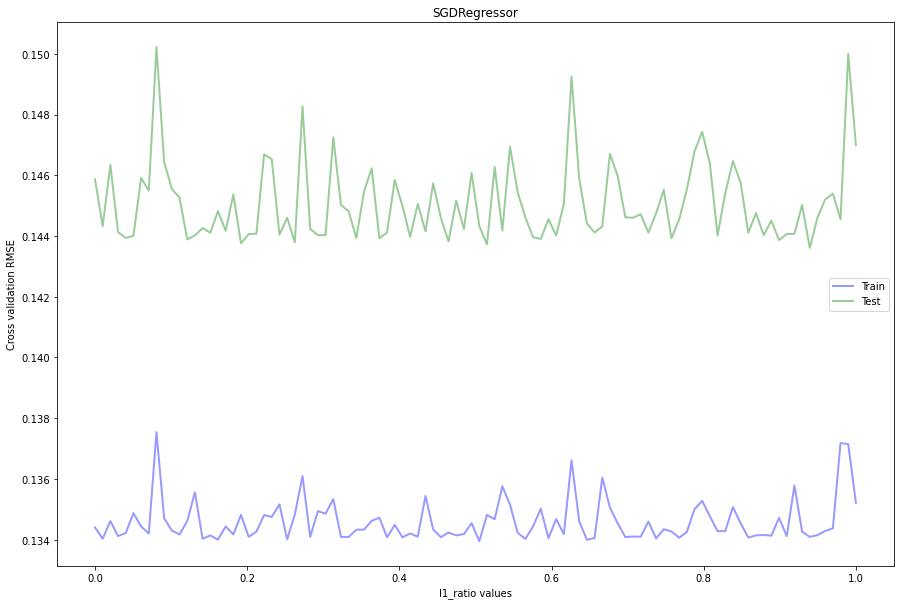

In [256]:
l1_ratio_range = np.linspace(0.0001,1, 100)
param_name = "l1_ratio" 
param_value = l1_ratio_range
verbose=False

model = SGDRegressor(penalty='elasticnet')

train_scores, test_scores, min_err_alpha,min_err_idx = calc_params(X_train, Y_train,model, param_value, param_name, 5, verbose, "SGDRegressor")
    
print ('\n\n The minimum RMSE for \"SGDRegressor\" using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])

###### From above output, we can say that the l1_ratio value of 0.4141 gives the lowest RMSE on training data (0.137 ). So, we will use that to run the model on set aside test data with "elasticnet" as the penalty parameter.

In [257]:
# Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor(penalty='elasticnet', l1_ratio=min_err_alpha[0])
sgd.fit(X_train, Y_train)
pred = sgd.predict(X_test)
MAE = np.sqrt(mean_absolute_error(Y_test, pred))

print ('MAE on set-aside test data set: %0.8f' % MAE, "with penalty equals to 'elasticnet' and l1_ratio = ",min_err_alpha[0])

MAE on set-aside test data set: 0.32172464 with penalty equals to 'elasticnet' and l1_ratio =  0.9393999999999999


# RMSE on Train Data

# RMSE on Test Data

# Que 2-A

 Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function in the included module. Note: you should not use external function for computing Cosine. Write your own version that computes Cosine similarity between two n-dimentional vectors and returns the inverse as the distance between these vectors.


In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [260]:
def calculateEuclideanDistance(x,D):
    dist = np.sqrt((D -x)**2).sum(axis=1)
    return dist

def calculateCosineSimilarityDistance(x,D):
    
    D_norm = np.linalg.norm(D) #np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    #print("D_norm ",D_norm," x_norm ",x_norm)
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dist = 1 - sims
    
    return dist

# Que 2-B

Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, use the train_test_split function (with random_state = 99) to perform a randomized split the data set (the document by term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. Next, as in the previous assignment, perform TFxIDF transformation on these data sets. [Note: if you have difficulty with TFxIDF conversion, then use the original non-transformed data for the remainder of this assignment].

In [261]:
matrix = pd.read_table("/Users/vinodpatel/Desktop/DePaul/DSC 478 Programming machine learning/Hw3/newsgroups5/matrix.txt",delimiter=',',header=None)
terms = pd.read_table("/Users/vinodpatel/Desktop/DePaul/DSC 478 Programming machine learning/Hw3/newsgroups5/terms.txt",delimiter=',',header=None)
classes = np.genfromtxt("/Users/vinodpatel/Desktop/DePaul/DSC 478 Programming machine learning/Hw3/newsgroups5/classes.txt",delimiter=' ', dtype=int, skip_header=1, usecols=(1))

In [262]:
matrix

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [263]:
terms

,0
0,aa
1,aargh
2,aaron
3,aaronc
4,ab
...,...
9323,zubov
9324,zv
9325,zw
9326,zx


In [264]:
classes

array([0, 1, 1, ..., 3, 4, 2])

In [265]:
print("Matrix Shape: " + str(matrix.shape))
print("Terms Shape: " + str(terms.shape))
print("Classes Shape: " + str(classes.shape))

Matrix Shape: (9328, 2500)
Terms Shape: (9328, 1)
Classes Shape: (2500,)


In [266]:
matrixT = matrix.T
matrixT.shape

(2500, 9328)

In [267]:
DTmatrix = np.mat(matrixT)
DTmatrix.shape

(2500, 9328)

In [268]:
from sklearn.model_selection import train_test_split

In [272]:
x_train, x_test, y_train, ytest = train_test_split(matrixT, classes, test_size=0.2, random_state=99)

In [273]:
print("train : ",x_train.shape)
print("Test : ",x_test.shape)

train :  (2000, 9328)
Test :  (500, 9328)


# Que 2-C

Perform Kmeans clustering on the transformed training data from part (b) Perform a qualitative analysis of the clusters by examining top features in each cluster and identifying patterns in the data. To facilitate your analysis of the clusters, write a function to display the top N terms in each cluster sorted by the cluster DF values for each term, the centroid weights for each term in the top N terms in the cluster (mean TFxIDF weight of the term), and the size of the cluster. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%). Sort the terms for each cluster in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for a sample of clusters are displayed in decreasing order of cluster DF values, but the mean frequency (mean TFxIDF values) from the cluster centroid is also shown).

In [274]:
## get random centroids
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.zeros((k,n), dtype=float)
    for j in range(n): #create random cluster centers
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k)
    return centroids

In [275]:
def kmeans(D,k,distMeas=calculateCosineSimilarityDistance,createCentroid = randCent):
    m = np.shape(D)[0]
    
    ## cluster assignment matrix with 2 cols. one for cluster index and 2nd one for cluster error (distance from cluster centroid to the current point)
    clusterAssment = np.mat(np.zeros((m,2)))
    
    print('calculating centroids : Start')
    centroids = createCentroid(D,k)
    print('calculating centroids : End','\n centroids are :: \n',centroids)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        ## loop over data points and assign assign it to the closest centroid
        for i in range(m):
            minDIst = np.inf;
            minIndex = -1;
            for j in range(k):
                distJI = distMeas(centroids[j,:],D[i,:])
    
                if(distJI < minDIst):
                    minDIst = distJI;
                    minIndex = j;
            if clusterAssment[i,0] !=minIndex : clusterChanged = True
            clusterAssment[i,:] = minIndex, minDIst**2
        
        ## update the centroid
        for cent in range(k):
            ptsInClust = D[np.nonzero(clusterAssment[:,0] == cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust,axis=0)
    return centroids, clusterAssment

In [276]:
%%time
data = np.mat(x_train)
centroids, clusterAssment = kmeans(data,5)

calculating centroids : Start
calculating centroids : End 
 centroids are :: 
 [[ 0.62  0.68 14.12 ...  1.33  0.4   2.68]
 [ 0.67  0.18 27.54 ...  1.67  0.47  4.07]
 [ 0.49  0.97 38.95 ...  1.52  0.13  2.55]
 [ 0.24  0.14 33.58 ...  1.74  0.15  1.78]
 [ 0.78  0.14 25.67 ...  1.41  0.62  4.31]]


/var/folders/y1/rcx3rhfx4dj1v_rvs8qnbc0c0000gn/T/ipykernel_33479/11797310.py:24: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  clusterAssment[i,:] = minIndex, minDIst**2


CPU times: user 4min 20s, sys: 1.03 s, total: 4min 21s
Wall time: 4min 12s


In [277]:
print(" centroids shape",centroids.shape)
print(" clusterAssment shape ",clusterAssment.shape)

 centroids shape (5, 9328)
 clusterAssment shape  (2000, 2)


In [278]:
def cluster_report(data,terms, clusters, centroids):
    clustersDF = pd.DataFrame(clusters)
    term_list = pd.Series(terms[0], name='Term')
    
    cluster_labels = np.unique(clustersDF[0])
    result = {}
    size ={}
    for c in cluster_labels:
        c = int(c)
        print(c)
        ## get the index of the train data from cluster c
        cl_data = x_train.index[clustersDF[0]==c]

        # gen centroids/frequency for the current (ith) cluster
        centroid = pd.Series(centroids[c], name='Freq')

        cl_size = len(cl_data)
        size[c] = cl_size
        
        ## doc by term
        docs_from_cluster = x_train[x_train.index.isin(cl_data)]

        ## term by doc
        docs_from_cluster = docs_from_cluster.T

        ## count all non zero terms
        DF = (pd.DataFrame([(docs_from_cluster!=0).sum(1)]).T)

        ## if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, 
        ##then DF value of "game" in that cluster is 0.2 or 20%
        DF = DF / size[c]
        ## divide each term count by number of docs in cluser
        
        DF.columns=['DF']
        
        DF_PERCENT = DF.copy()
        DF_PERCENT = DF_PERCENT * 100
        DF_PERCENT.columns=['% of Docs']
        ##print("docs_from_cluster \n",docs_from_cluster)

        ## concatenate the terms, centroid and DF values for the cluster
        term_centroid = pd.concat([term_list, centroid,DF,DF_PERCENT],axis=1)
        
        result[c] = term_centroid
    return result , size

In [279]:
def display_clusters(clusterDict, clusterSize, numTerms):
    for c in clusterDict.keys():
        cluster_rep = clusterDict[c]
        print("\nCluster ", c, "size =", clusterSize[c])
        print("----------------------------------------------")
        print(cluster_rep.sort_values(by="DF", ascending=False).head(numTerms))
    return

In [280]:
x_train = pd.DataFrame(x_train)
clusterDict_nonidf , clusterSize_nonidf = cluster_report(x_train,terms,clusterAssment,centroids)
print(clusterDict_nonidf.keys())

print("\ncluster# :: # of docs")
for key in clusterSize_nonidf.keys():
      print(key," \t :: ",clusterSize_nonidf[key])

1
2
4
dict_keys([1, 2, 4])

cluster# :: # of docs
1  	 ::  5
2  	 ::  394
4  	 ::  1601


In [281]:
numOfTopNTerms = 10
display_clusters(clusterDict_nonidf,clusterSize_nonidf,numOfTopNTerms)


Cluster  1 size = 5
----------------------------------------------
       Term  Freq   DF  % of Docs
443    asqq   5.0  1.0      100.0
2508     ei   8.2  1.0      100.0
3317   gkwt   3.2  1.0      100.0
744     bhj   4.6  1.0      100.0
1420  cliff   1.0  1.0      100.0
5680   nriz   4.0  1.0      100.0
5428    mwt   3.8  1.0      100.0
3385     gp   4.6  1.0      100.0
4835     ma   7.0  1.0      100.0
5426     mw  10.2  1.0      100.0

Cluster  2 size = 394
----------------------------------------------
         Term  Freq    DF  % of Docs
7895  subject  1.04  1.00     100.00
3198     game  1.75  0.57      56.85
9129    write  0.66  0.54      53.55
8098     team  1.22  0.46      46.45
3339       go  0.88  0.44      43.91
3708   hockei  0.76  0.43      42.89
417    articl  0.51  0.42      41.62
6186     plai  1.11  0.41      41.37
5795       on  0.63  0.38      38.32
3266      get  0.70  0.35      34.77

Cluster  4 size = 1601
----------------------------------------------
         T

In [282]:
## Repeating the above with DT_IDF
termFreqs = matrix.sum(axis=1).astype(np.int64)
termFreqs.shape

(9328,)

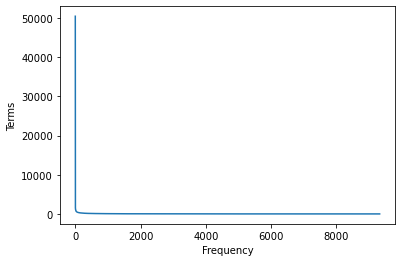

In [283]:
plt.plot(sorted(termFreqs, reverse=True))
plt.xlabel('Frequency')
plt.ylabel('Terms')
plt.show()

The above graph shows us a zift curve. This means that most of the terms are very less frequent

In [284]:
print("TD ", matrix.shape)
DTmatrix = matrix.T
print("DT ",DTmatrix.shape)

TD  (9328, 2500)
DT  (2500, 9328)


In [285]:
numTerms=DTmatrix.shape[1]
NDocs = DTmatrix.shape[0]
TDmatrix = matrix
print("numTerms ",numTerms," NDocs ",NDocs)

# Note: doc frequency (df) for a term t is the number of docs in which t appears divided by total number of docs

# first let's find the doc counts for each term

DF = pd.DataFrame([(TDmatrix!=0).sum(1)]).T
print(DF.shape)

# Create a matrix with all entries = NDocs
NMatrix=np.ones(np.shape(TDmatrix), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

# Convert each entry into IDF values
# IDF is the log of the inverse of document frequency
# Note that IDF is only a function of the term, so all columns will be identical.

IDF = np.log2(np.divide(NMatrix, np.array(DF)))

np.set_printoptions(precision=2,suppress=True)
print(IDF)

pd.set_option("display.precision", 2)

# Finally compute the TFxIDF values for each document-term entry
TD_tfidf = TDmatrix * IDF

print("TD_tfidf",TD_tfidf)

DT_tfidf = TD_tfidf.T
DT_tfidf = np.mat(DT_tfidf)

print("DT_tfidf.shape :",DT_tfidf.shape)


numTerms  9328  NDocs  2500
(9328, 1)
[[2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 ...
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]]
[[7.97 7.97 7.97 ... 7.97 7.97 7.97]
 [8.7  8.7  8.7  ... 8.7  8.7  8.7 ]
 [6.83 6.83 6.83 ... 6.83 6.83 6.83]
 ...
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.7  9.7  9.7  ... 9.7  9.7  9.7 ]
 [9.29 9.29 9.29 ... 9.29 9.29 9.29]]
TD_tfidf       0     1     2     3     4     5     6     7     8     9     ...  2490  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

In [286]:
x_train_df, x_test_idf, y_train_idf, y_test_idf = train_test_split(DT_tfidf, classes, test_size=0.2, random_state=99)


In [287]:
data = np.mat(x_train_df)
centroids, clusterAssment = kmeans(data,5)

print(" clusterAssment : ",clusterAssment.shape)
print(" centroids : ",centroids.shape)

calculating centroids : Start
calculating centroids : End 
 centroids are :: 
 [[  6.3    0.25 189.49 ...   9.79   6.25  19.73]
 [  2.2    3.46 292.34 ...   3.8    8.4   26.72]
 [  7.47   0.73  84.22 ...   2.7    5.52  24.47]
 [  6.53   4.17 240.86 ...  13.22   0.76  30.6 ]
 [  7.31   7.89 248.44 ...  12.54   1.92   0.77]]


/var/folders/y1/rcx3rhfx4dj1v_rvs8qnbc0c0000gn/T/ipykernel_33479/11797310.py:24: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  clusterAssment[i,:] = minIndex, minDIst**2


 clusterAssment :  (2000, 2)
 centroids :  (5, 9328)


In [288]:
centroids

array([[0.  , 0.  , 0.  , ..., 1.39, 0.  , 0.  ],
       [0.02, 0.  , 1.22, ..., 0.  , 0.  , 0.  ],
       [0.09, 0.2 , 0.16, ..., 0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.04, ..., 0.  , 0.  , 0.  ],
       [0.02, 0.05, 0.  , ..., 0.03, 0.03, 0.14]])

In [289]:
x_train_df = pd.DataFrame(x_train_df)
clusterDict , clusterSize = cluster_report(x_train_df,terms,clusterAssment,centroids)
print(clusterDict.keys())

print("\ncluster# :: # of docs")
for key in clusterSize.keys():
      print(key," \t :: ",clusterSize[key])

0
1
2
3
4
dict_keys([0, 1, 2, 3, 4])

cluster# :: # of docs
0  	 ::  7
1  	 ::  397
2  	 ::  85
3  	 ::  762
4  	 ::  749


In [290]:
numOfTopNTerms = 10
display_clusters(clusterDict,clusterSize,numOfTopNTerms)


Cluster  0 size = 7
----------------------------------------------
         Term      Freq    DF  % of Docs
7895  subject      0.00  1.00     100.00
547        ax  41371.61  0.86      85.71
4982      max   2826.98  0.86      85.71
9144       wt     41.19  0.71      71.43
6183       pl    296.54  0.71      71.43
8275       tm     51.71  0.71      71.43
5238       ml     30.92  0.71      71.43
5975     part      4.59  0.71      71.43
3275    ghjkn     17.41  0.71      71.43
3279       gi     15.39  0.71      71.43

Cluster  1 size = 397
----------------------------------------------
           Term  Freq    DF  % of Docs
7895    subject  0.00  1.00     100.00
9129      write  0.91  0.63      63.22
3345        god  7.66  0.56      55.92
5795         on  1.91  0.55      54.91
417      articl  0.93  0.48      47.86
1335  christian  4.96  0.46      45.59
6049      peopl  2.53  0.45      44.84
4449       know  1.52  0.43      42.82
8203      think  1.47  0.41      40.55
693      believ  2.40

# Que 2-D

Using the cluster assignments from your Kmeans clustering and the original cluster labels for the training document, compare your clusters to the re-assigned classes by computing the Completeness and Homogeneity values. You should do this for the best values of k and the best clustering run you settled on in the previous part.


In [291]:
y_train_idf


array([1, 0, 0, ..., 3, 1, 0])

In [292]:
clusterAssment.T[0]


matrix([[4., 3., 3., ..., 4., 1., 3.]])

In [293]:
from sklearn.metrics import completeness_score, homogeneity_score

#NOTE: this generates a random score every time you run the cluster
print("completeness_score = ",completeness_score(y_train_idf,np.ravel(clusterAssment.T[0])))
print("homogeneity_score = ",homogeneity_score(y_train_idf,np.ravel(clusterAssment.T[0])))

completeness_score =  0.7038222149890767
homogeneity_score =  0.5293598469263906


# Que 2-E

Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate clusters (using your final clustering results in part c). Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the assigned cluster label as well as Cosine similarity to the corresponding cluster.


In [294]:
print(centroids.shape)
print(centroids)
print("vs_test_idf shape ",x_test_idf.shape)

(5, 9328)
[[0.   0.   0.   ... 1.39 0.   0.  ]
 [0.02 0.   1.22 ... 0.   0.   0.  ]
 [0.09 0.2  0.16 ... 0.   0.   0.  ]
 [0.04 0.   0.04 ... 0.   0.   0.  ]
 [0.02 0.05 0.   ... 0.03 0.03 0.14]]
vs_test_idf shape  (500, 9328)


In [295]:
results = []

x_test = np.array(x_test_idf)
for doc in x_test:
    dic = {}
    sim = []
    cluster = 0
    for centroid in centroids:
        val = np.ravel(calculateCosineSimilarityDistance(doc,centroid))[0]
        centroid_doc_sim = 1 - val #Need to subtract from 1 as our function returns distance and not similarity
        #print("centroid_doc_sim ",centroid_doc_sim)
        sim.append(centroid_doc_sim) 
        dic['Cosine Similarity to Cluster '+str(cluster)] = str(np.ravel(centroid_doc_sim)[0])
        cluster += 1
        
    dic['Predicted Cluster'] = sim.index(max(sim)) 
    
    results.append(dic)

test_cluster = pd.DataFrame(results)

In [296]:
pd.options.display.max_rows = 50
print("Categorized test data shape ",test_cluster.shape)

test_cluster

Categorized test data shape  (500, 6)


,Cosine Similarity to Cluster 0,Cosine Similarity to Cluster 1,Cosine Similarity to Cluster 2,Cosine Similarity to Cluster 3,Cosine Similarity to Cluster 4,Predicted Cluster
0,4.5583202166188386e-06,0.08944121167142005,0.047725441060355256,0.09720361533027644,0.1833544881819602,4
1,0.0,0.06185648309728442,0.04123648783097833,0.07969377664212973,0.08677937326923102,4
2,3.501293787033788e-05,0.06110296508438495,0.04688141581038019,0.18987198298442753,0.06760655603048515,3
3,3.934667201721531e-06,0.02274081886122059,0.014087762938468584,0.020530092916457354,0.07600505882203468,4
4,5.661633320164228e-06,0.3128043195712311,0.05192691242888736,0.0771693060384987,0.07490449031494484,1
...,...,...,...,...,...,...
495,0.0,0.19135234245668953,0.021125721148937182,0.03392802615102131,0.03710087138597007,1
496,1.0737448201236788e-05,0.03467982168154704,0.052756710889425906,0.033000059470316256,0.1299856602891316,4
497,6.75703351453727e-05,0.036971047685655845,0.03433798753139217,0.042949824438580864,0.07601441544082466,4
498,1.986801586029152e-06,0.031166076116140085,0.03811656860629686,0.19293650675300156,0.04659245839460602,3
